In [106]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Malgun Gothic'

# make_classification

- n_samples : 표본 데이터의 수, 디폴트 100
- n_features : 독립변수의 수, 디폴트 20
- n_informative : 독립변수 중 종속 변수와의 상관관계가 있는 성분의 수, 디폴트 2

**실제로 y예측에 도임이 되는 변수**

- n_redundant : 독립변수 중 다른 독립변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2

**대부분의 분류문제에서의 다중 공선성은 문제가 되지 않는다.**
- n_repeated : 독립변수 중 단순 중복된 성분의 수, 디폴트 0
- n_classes : 종속변수의 클래스 수, 디폴트 2
- n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
- weights : 각 클래스에 할당된 표본 수



- x : [n_samples, n_features] 배열 (독립변수)
- y : [n_samples] 배열 (종속변수)

# 가상 데이터 생성

1개의 독립변수와 두개의 클래스를 가진 데이터를 생성

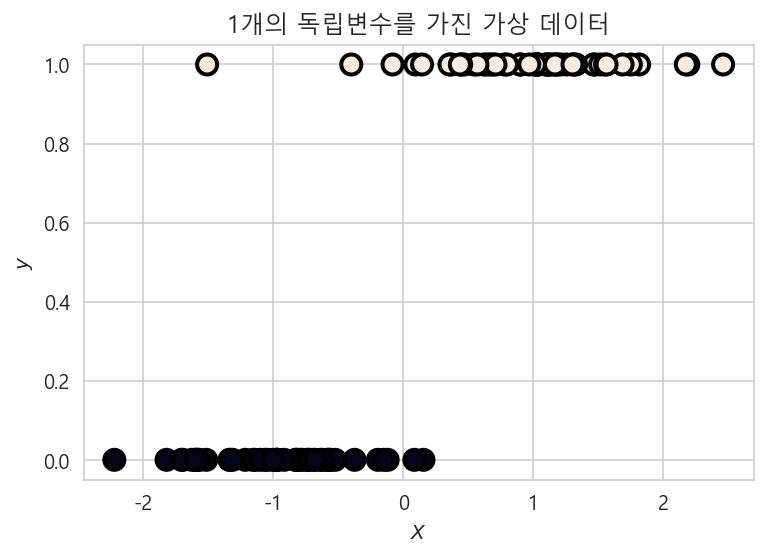

In [107]:
from sklearn.datasets import make_classification

plt.title('1개의 독립변수를 가진 가상 데이터')

X, y = make_classification(n_features=1,
                          n_informative=1,
                          n_redundant=0,
                          n_clusters_per_class=1,
                          random_state=4)

plt.scatter(X, y, marker='o', c=y,
           s=100, edgecolor='k', linewidths=2)
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.show()

위 그래프를 통해 $X$값이 음수이면 대부분의 $y$값이 0이고 $X$값이 양수이면 대부분의 $y$값이 1임을 확인할 수 있다.

따라서 위 데이터의 경우 threshold를 0근처로 잡게 되면 두 클래스를 잘 분류할 수 있다.

In [108]:
class0 = X[y==0]

predict = []
for threshhold in np.arange(-0.5, 0.5, 0.1):
    predict.append((class0 < threshhold).sum())

for i, j in zip(predict, np.round(np.arange(-0.5, 0.5, 0.1), 2)):
    print('threshhold :', j, ' True :',i)

threshhold : -0.5  True : 43
threshhold : -0.4  True : 43
threshhold : -0.3  True : 44
threshhold : -0.2  True : 44
threshhold : -0.1  True : 47
threshhold : -0.0  True : 47
threshhold : 0.1  True : 48
threshhold : 0.2  True : 49
threshhold : 0.3  True : 49
threshhold : 0.4  True : 49


In [109]:
class1 = X[y==1]

predict2 = []
for threshhold in np.arange(-0.5, 0.5, 0.1):
    predict2.append((class1 > threshhold).sum())

for i, j in zip(predict2, np.round(np.arange(-0.5, 0.5, 0.1), 2)):
    print('threshhold :', j, ' True :',i)

threshhold : -0.5  True : 50
threshhold : -0.4  True : 49
threshhold : -0.3  True : 49
threshhold : -0.2  True : 49
threshhold : -0.1  True : 49
threshhold : -0.0  True : 48
threshhold : 0.1  True : 47
threshhold : 0.2  True : 46
threshhold : 0.3  True : 46
threshhold : 0.4  True : 44


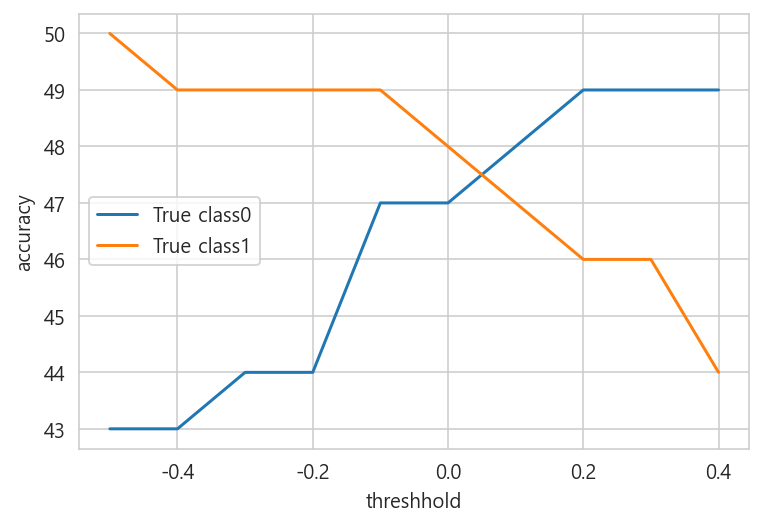

In [110]:
plt.plot(np.round(np.arange(-0.5, 0.5, 0.1), 2), predict, label='True class0')
plt.plot(np.round(np.arange(-0.5, 0.5, 0.1), 2), predict2, label='True class1')
plt.legend()
plt.xlabel('threshhold')
plt.ylabel('accuracy')
plt.show()

실제로 두 클래스를 가장 잘 분류하는 임계치는 0보다 살짝 높은 값임을 확인할 수 있다.

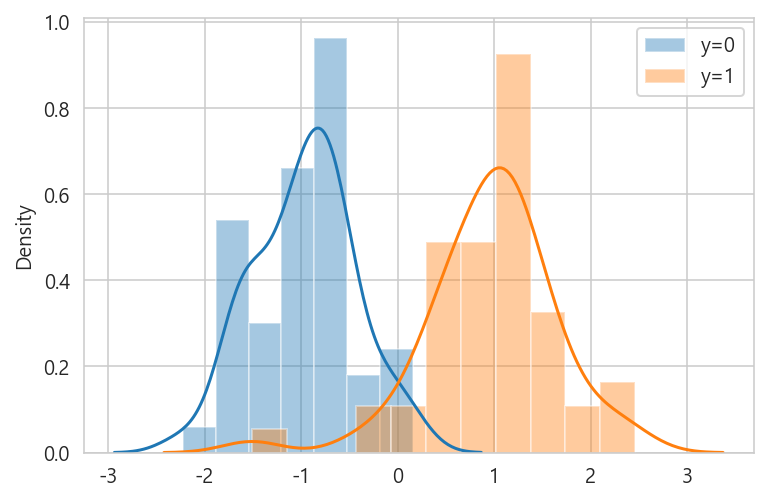

In [111]:
sns.distplot(X[y==0], label='y=0')
sns.distplot(X[y==1], label='y=1')
plt.legend()
plt.show()

`n_informative`를 1로 설정

2개의 독립변수 중 실제로 target 클래스와 상관관계가 있는 것은 1개의 독립변수

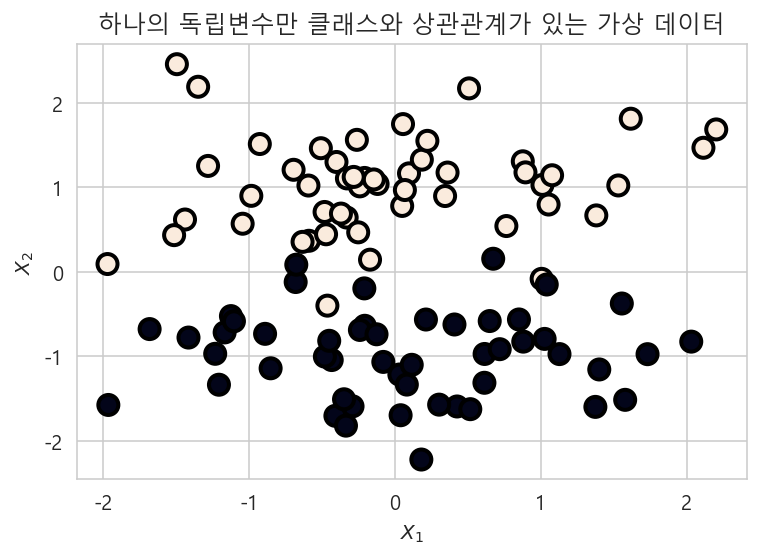

In [112]:
plt.title("하나의 독립변수만 클래스와 상관관계가 있는 가상 데이터")
X, y = make_classification(n_features=2, n_informative=1, n_redundant=0,
                           n_clusters_per_class=1, random_state=4)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

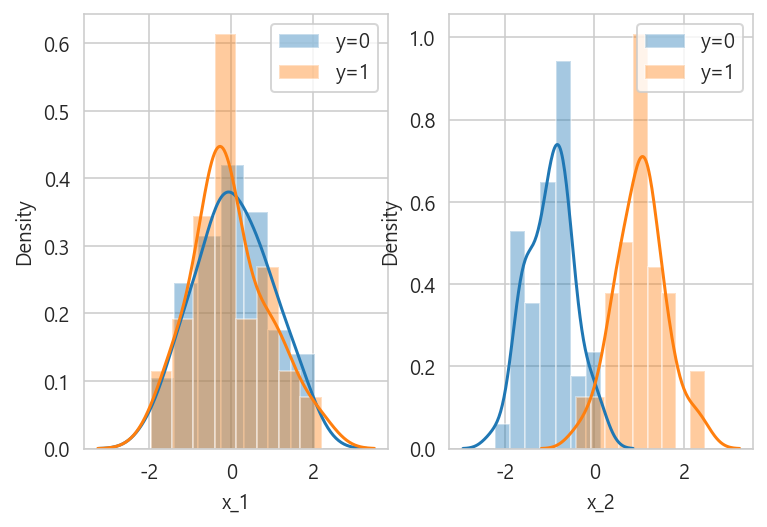

In [113]:
plt.subplot(121)
sns.distplot(X[y == 0, 0], label="y=0")
sns.distplot(X[y == 1, 0], label="y=1")
plt.legend()
plt.xlabel("x_1")
plt.subplot(122)
sns.distplot(X[y == 0, 1], label="y=0")
sns.distplot(X[y == 1, 1], label="y=1")
plt.legend()
plt.xlabel("x_2")
plt.show()

`n_informative`를 2로 설정

두 변수 모두 클래스와 상관관계를 가짐

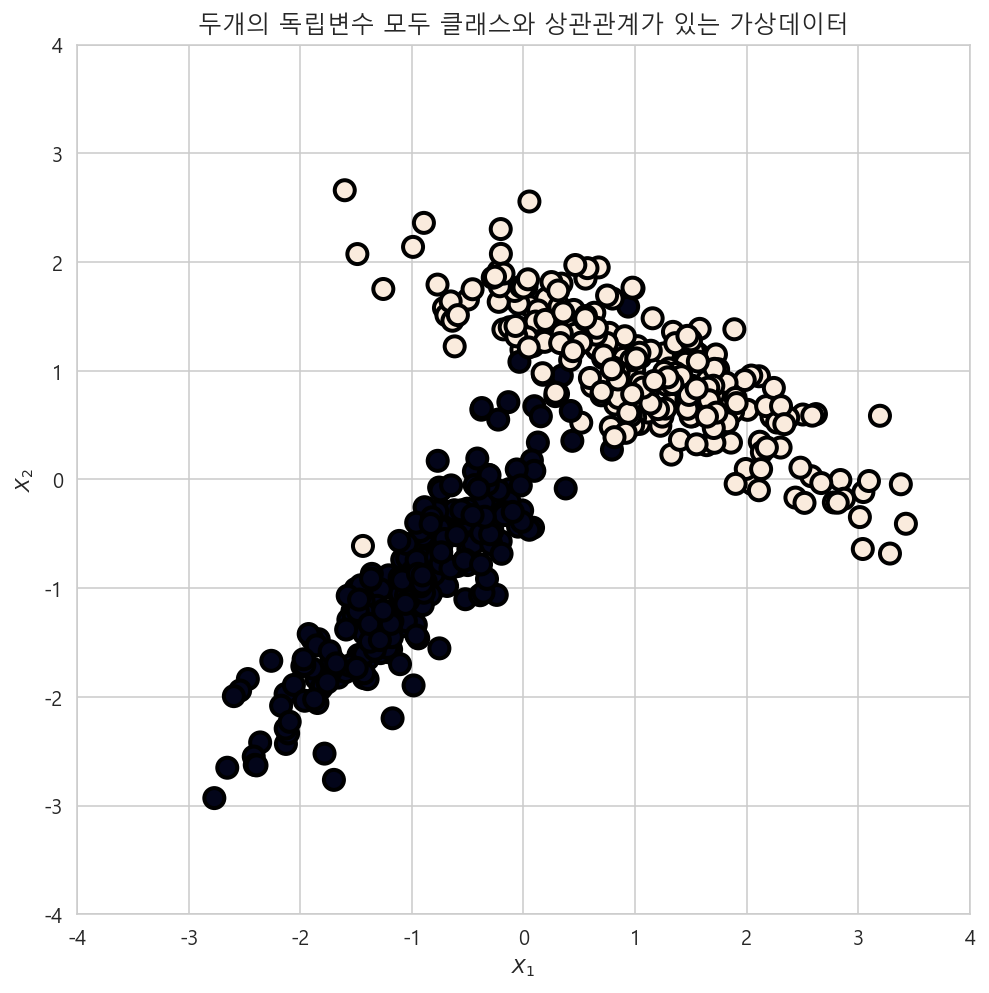

In [114]:
plt.figure(figsize=(8, 8))
plt.title("두개의 독립변수 모두 클래스와 상관관계가 있는 가상데이터")
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=6)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

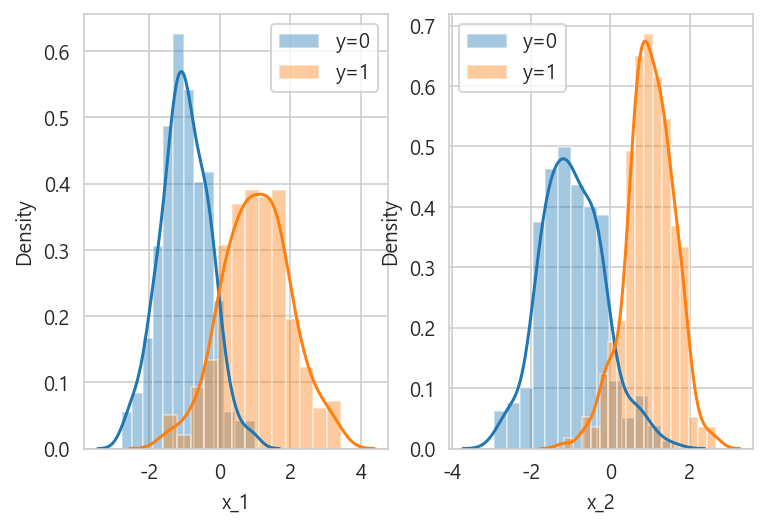

In [115]:
plt.subplot(121)
sns.distplot(X[y == 0, 0], label="y=0")
sns.distplot(X[y == 1, 0], label="y=1")
plt.legend()
plt.xlabel("x_1")
plt.subplot(122)
sns.distplot(X[y == 0, 1], label="y=0")
sns.distplot(X[y == 1, 1], label="y=1")
plt.legend()
plt.xlabel("x_2")
plt.show()

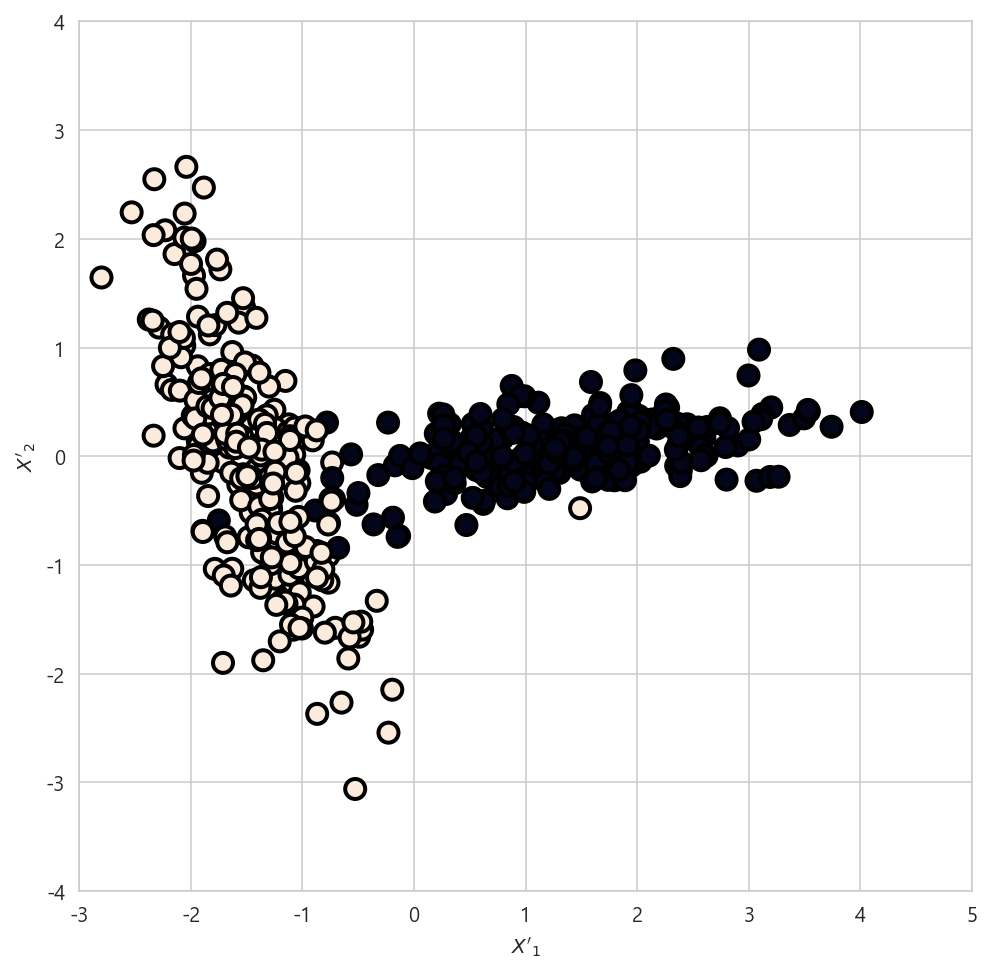

In [116]:
l, V = np.linalg.eig(X.T @ X)
X2 = -X @ V

plt.figure(figsize=(8, 8))
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=2)
plt.xlabel("$X'_1$")
plt.ylabel("$X'_2$")
plt.xlim(-3, 5)
plt.ylim(-4, 4)
plt.show()

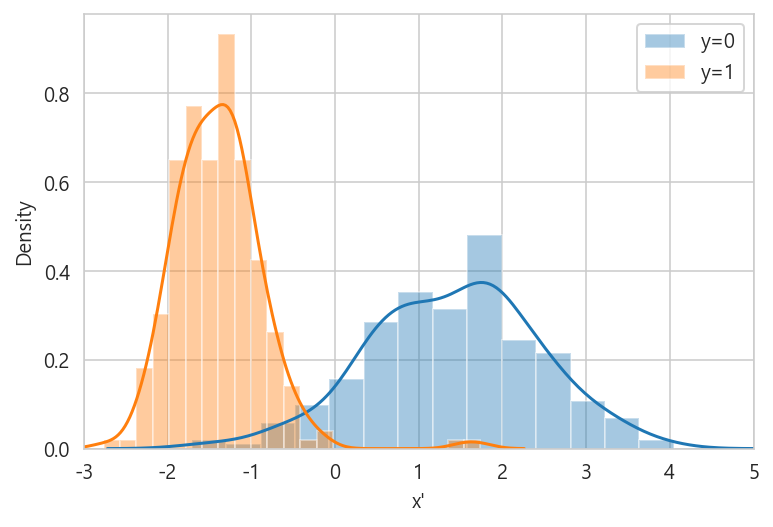

In [117]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

sns.distplot(X_pca[y == 0], label="y=0")
sns.distplot(X_pca[y == 1], label="y=1")
plt.legend()
plt.xlabel("x'")
plt.xlim(-3, 5)
plt.show()

클래스별 데이터 갯수의 차이 : weights 파라미터 조정
    
    

각 클래스별 데이터의 갯수 - 0 클래스 : 90, 1 클래스 : 10


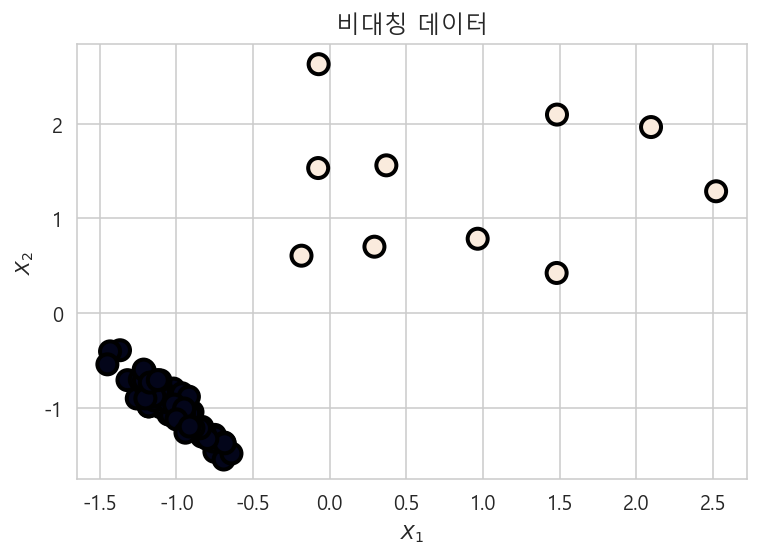

In [118]:
plt.title("비대칭 데이터")
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.9, 0.1], random_state=6)
val, cnt = np.unique(y, return_counts=True)
print("각 클래스별 데이터의 갯수 - {} 클래스 : {}, {} 클래스 : {}".format(val[0], cnt[0], val[1], cnt[1]))

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

`n_clusters_per_class` 파라미터를 2로 설정

클래스 당 클러스터의 갯수 조정

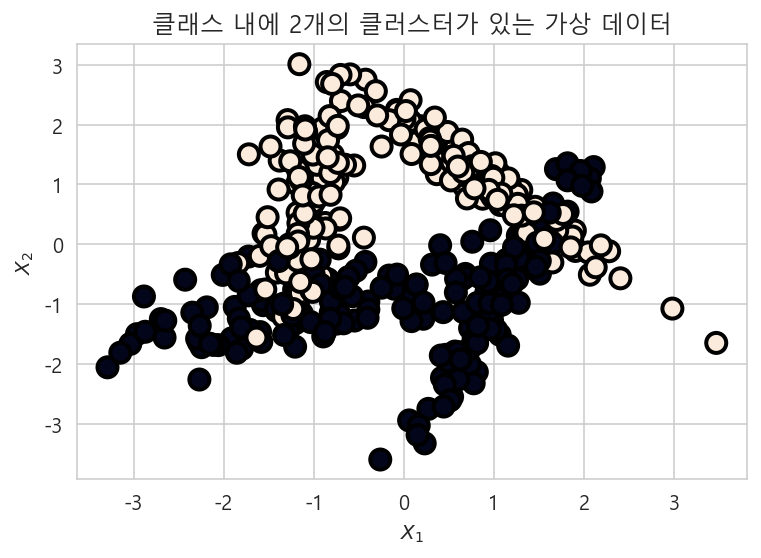

In [119]:
plt.title("클래스 내에 2개의 클러스터가 있는 가상 데이터")
X2, Y2 = make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0,
                             n_clusters_per_class=2, random_state=0)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

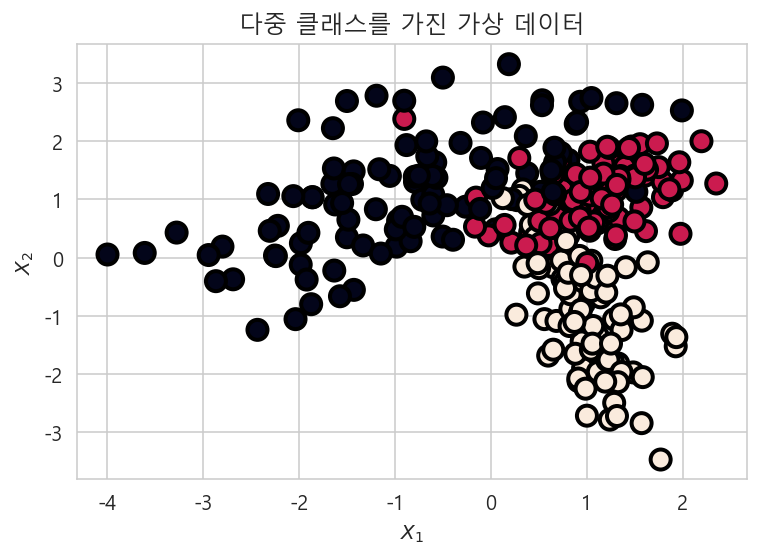

In [120]:
plt.title("다중 클래스를 가진 가상 데이터")
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=3, random_state=0)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()